In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix



In [82]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's now look for null values in the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Lets look at the unique values since we can observe that there are no null values in the dataset

In [8]:
for value in dataset:
    print('For {},{} unique values present'.format(value,dataset[value].nunique()))

For id,21436 unique values present
For date,372 unique values present
For price,4028 unique values present
For bedrooms,13 unique values present
For bathrooms,30 unique values present
For sqft_living,1038 unique values present
For sqft_lot,9782 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For grade,12 unique values present
For sqft_above,946 unique values present
For sqft_basement,306 unique values present
For yr_built,116 unique values present
For yr_renovated,70 unique values present
For zipcode,70 unique values present
For lat,5034 unique values present
For long,752 unique values present
For sqft_living15,777 unique values present
For sqft_lot15,8689 unique values present


In [83]:
#dropping 'id' and 'date' since we dont need them at this point.
dataset = dataset.drop(['id','date'],axis=1)

#lets now look at the modified dataset
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Data Visualisation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

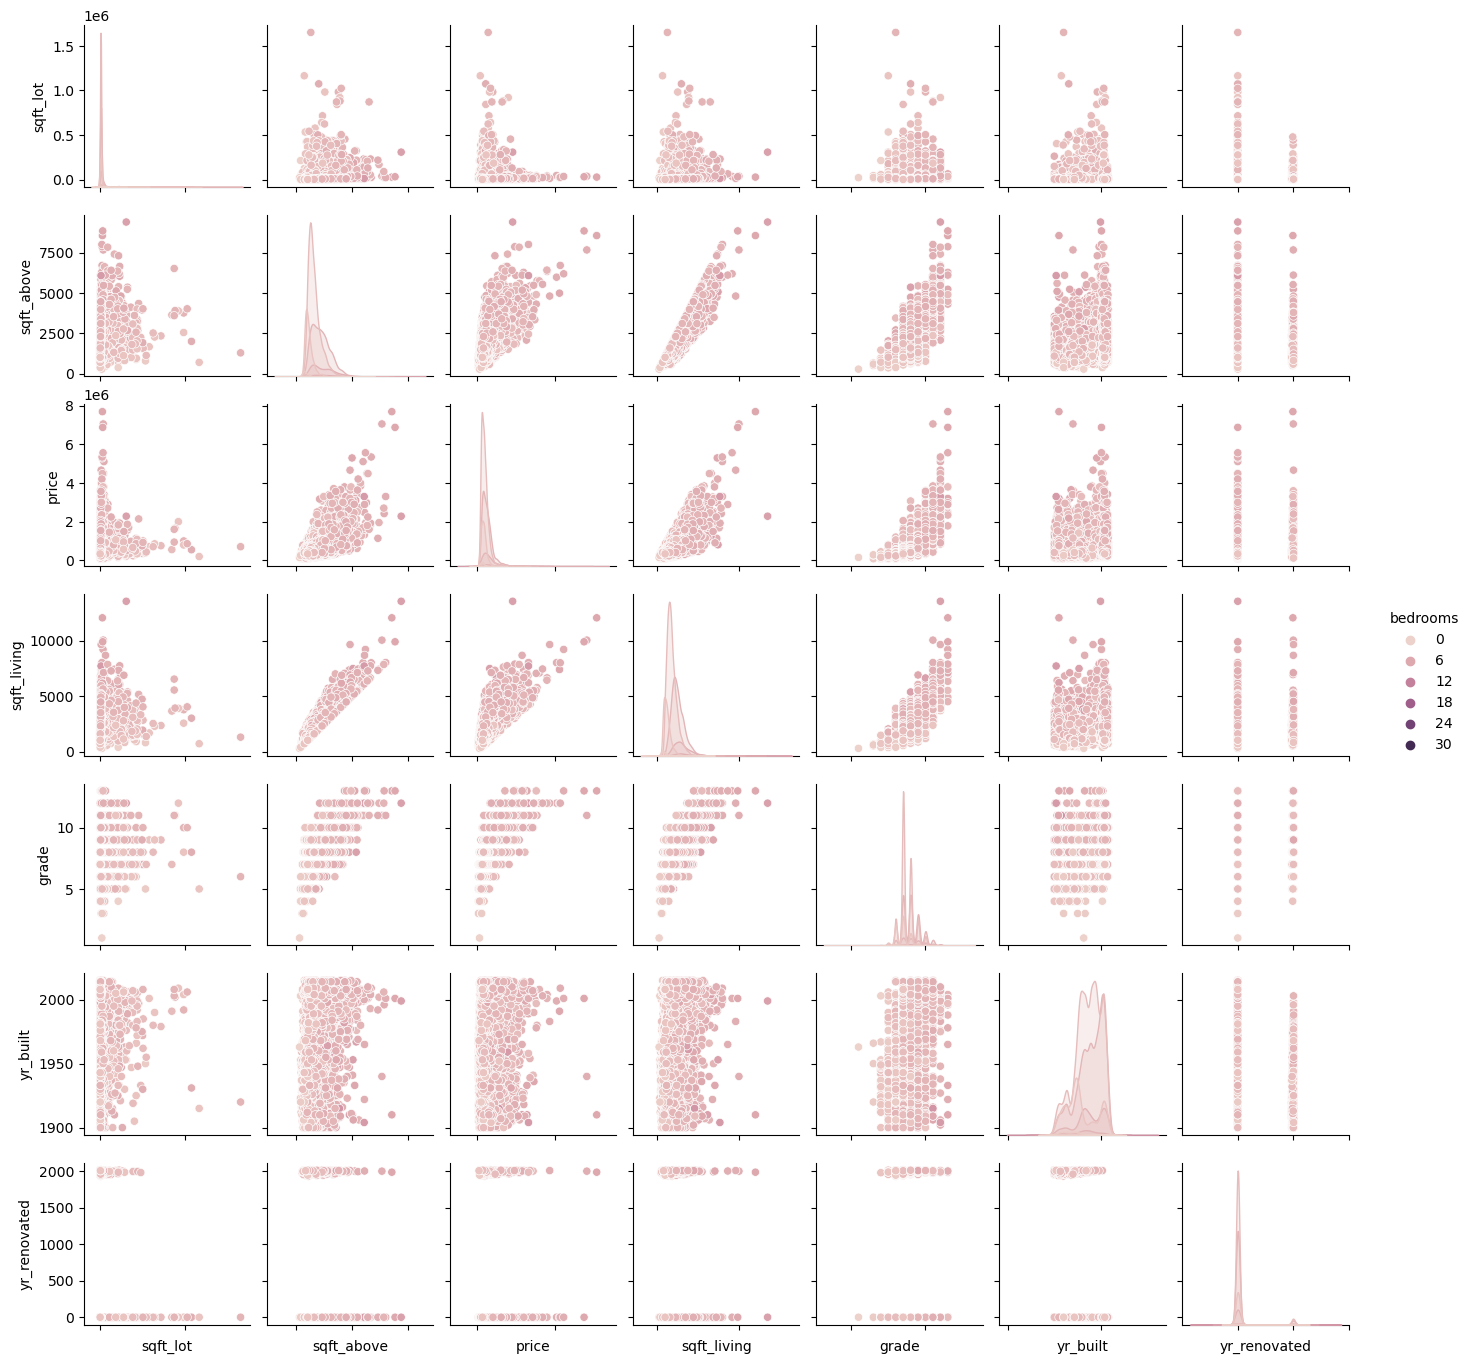

In [15]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',size=2)
g.set(xticklabels=[])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


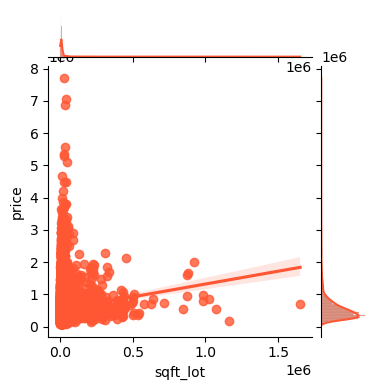

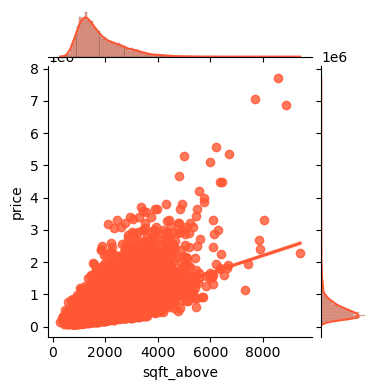

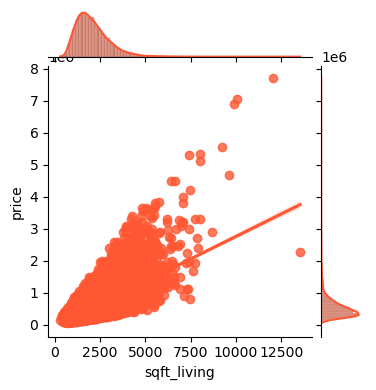

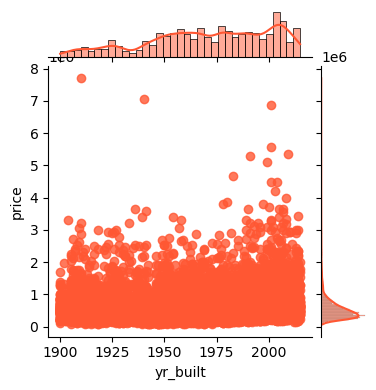

In [84]:
sns.jointplot(x='sqft_lot',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='sqft_above',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='sqft_living',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='yr_built',y='price',data=dataset,kind='reg',size=4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


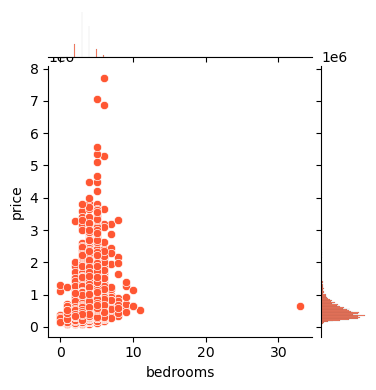

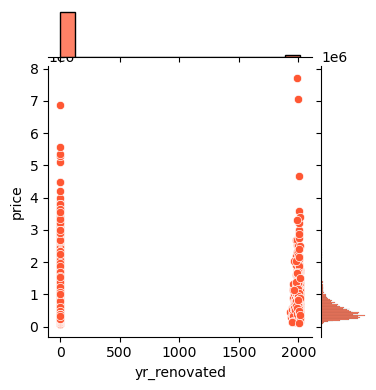

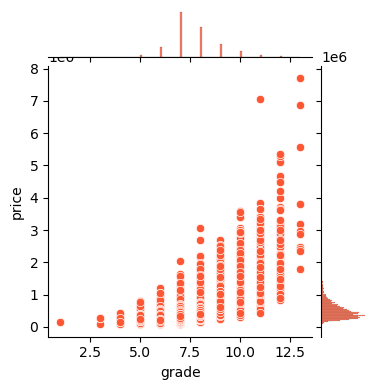

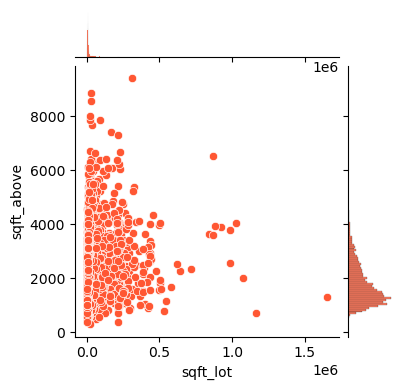

In [85]:
sns.jointplot(x='bedrooms',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='yr_renovated',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='grade',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='sqft_lot',y='sqft_above',data=dataset,kind='scatter',size=4)

<AxesSubplot:>

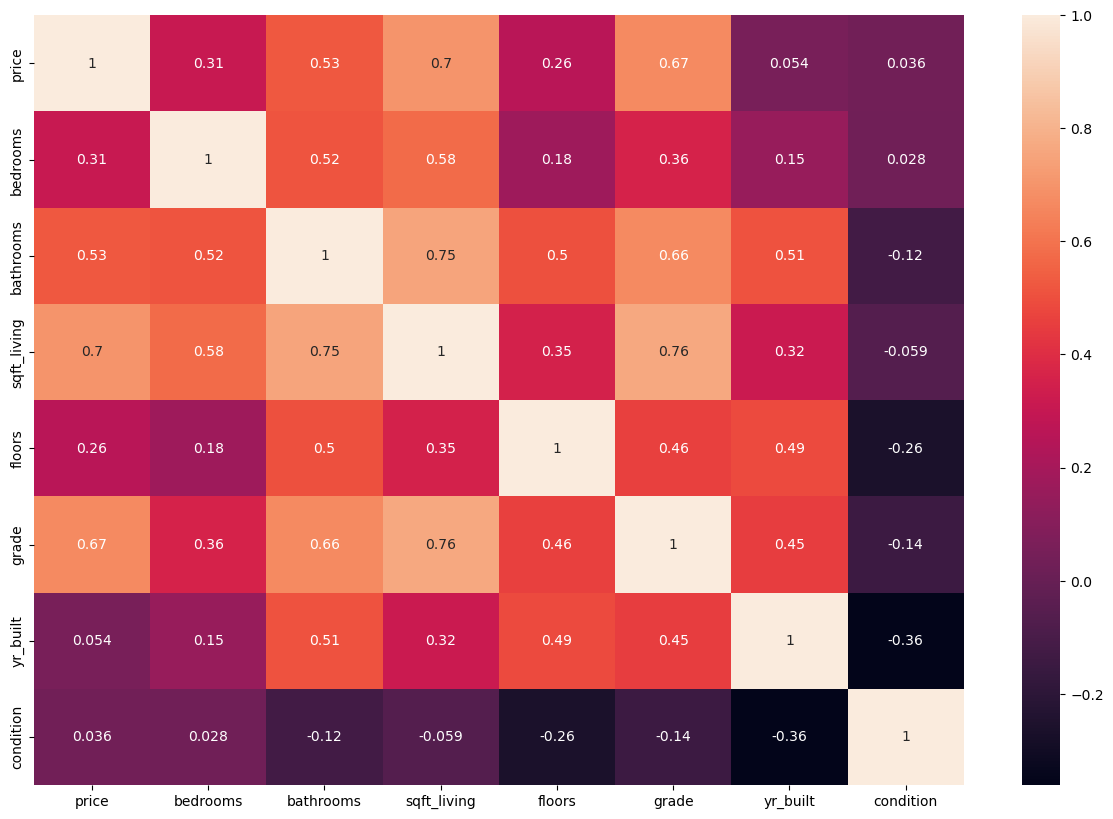

In [16]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sns.heatmap(dataset[columns].corr(),annot=True)

In [17]:
# X(Independent variables) and y(target variables) 
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [18]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# DECISION TREE

In [19]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [20]:
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))


Decision tree  Regression Model Score is  75


# Random Forest

In [61]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [62]:
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

Random Forest Regression Model Score is  88


## Regression model using Light gradient boosting

In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [66]:
# Load the dataset
dataset = pd.read_csv("kc_house_data.csv")

# Drop the ID and date columns
dataset = dataset.drop(['id', 'date'], axis=1)

In [53]:
# Split the data into training and testing sets
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

In [54]:
# Perform NCv test
ncv_results = sm.stats.diagnostic.linear_rainbow(model)
print("NCv test results:")
print("F-statistic: ", ncv_results[0])
print("p-value: ", ncv_results[1])

NCv test results:
F-statistic:  1.0206443397181104
p-value:  0.18725137282839577


In [55]:
# Perform Durbin-Watson test
durbin_watson = sm.stats.stattools.durbin_watson(model.resid)
print("Durbin-Watson test statistic:", durbin_watson)

Durbin-Watson test statistic: 1.9973789306131742


In [56]:
# Perform VIF test
vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
print("VIF values:")
print(vif)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF values:
[22.47103222065785, 28.15084369055398, inf, 2.520301481647282, 16.787943788704034, 1.2335963852545513, 1.584291999085957, 34.81931008965336, 147.40188537640697, inf, inf, 9521.675826920573, 1.1976684115541492, 1637595.035270219, 138881.25182067603, 1362945.1183597934, 26.523257992608336, 2.760007511714864]


In [57]:
# Creating a lightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)

# Setting up the parameters
params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'num_leaves': 31,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'verbose': 0}

# Training the model
lgbm_regressor = lgb.train(params, lgb_train, num_boost_round=1000)

# Predicting on the test set
y_pred = lgbm_regressor.predict(X_test)

# Calculating the R-squared score
r2 = r2_score(y_test, y_pred)
print("LightGBM Regression Model R-squared score is ", round(r2, 4))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_col_wise=true` to remove the overhead.
LightGBM Regression Model R-squared score is  0.897


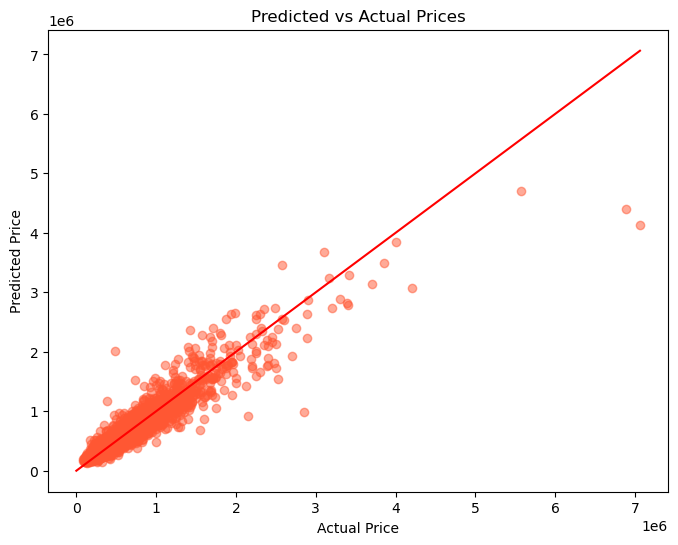

In [58]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = lgbm_regressor.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.show()


# Light gradient boosting

In [81]:
import lightgbm as lgb

dataset = pd.read_csv("kc_house_data.csv")
dataset = dataset.drop(['id','date'],axis=1)

In [76]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Creating a lightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)


In [77]:
# Setting up the parameters
params = {'boosting_type': 'rf',
          'objective': 'regression',
          'metric': 'rmse',
          'num_leaves': 31,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'verbose': 0}

In [78]:
# Training the model
lgbm_regressor = lgb.train(params, lgb_train, num_boost_round=1000)

# Predicting on the test set
y_pred = lgbm_regressor.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [79]:
# Calculating the R-squared score
r2 = r2_score(y_test, y_pred)

print("LightGBM Regression Model R-squared score is ", round(r2, 4))

LightGBM Regression Model R-squared score is  0.7849
